# Exécutez le code ci-dessous

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

In [2]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7
...,...,...,...,...
360,2019-12-27,13,10,8.7
361,2019-12-28,11,5,6.9
362,2019-12-29,9,2,8.7
363,2019-12-30,12,4,8.7


# Régression linéaire univariée avec Scikit-Learn

Scikit-Learn est la bibliothèque de Machine Learning la plus puissante pour Python. Vous vous souvenez que vous pouvez effectuer une régression linéaire avec NumPy ? Vous pouvez faire la même chose avec Scikit-Learn, et bien plus encore !

Commençons par une régression linéaire univariée pour apprendre la syntaxe.

## Afficher un regplot avec Seaborn et montrer une régression linéaire entre les heures d'ensoleillement (SUNHOUR) sur l'axe des X et la température maximale (MAX_TEMPERATURE_C) sur l'axe des Y.

<Axes: xlabel='SUNHOUR', ylabel='MAX_TEMPERATURE_C'>

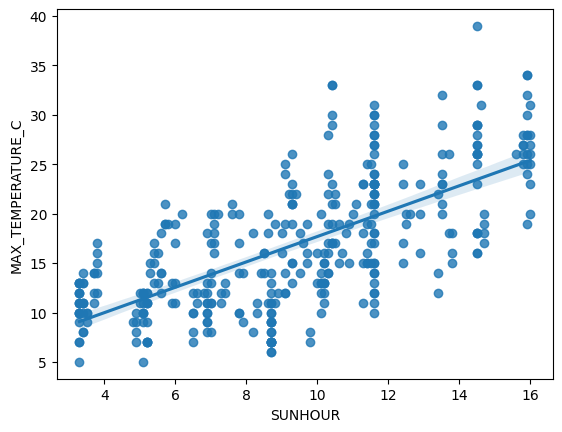

In [3]:
# Ton code ici :
sns.regplot(x = "SUNHOUR",
            y = "MAX_TEMPERATURE_C",
            data = df_weather)

## Entraînons le modèle
Pour cette partie, vous n'avez qu'à lire les commentaires et exécuter le code ci-dessous:

In [6]:
# Scikit-Learn peut trouver les coefficients de la régression linéaire
from sklearn.linear_model import LinearRegression

# Tout d'abord, vous devez définir 2 séries :
# X-axis : la colonne corrélée, ici ce sont les heures d'ensoleillement
X = df_weather[['SUNHOUR']]

# Y-axis : la colonne à prédire, donc ici la température maximale
y = df_weather['MAX_TEMPERATURE_C']

# Pourquoi "X" est en majuscule et "y" en minuscule ? Bonne question, nous verrons cela dans la prochaine quête. Maintenant, utilisez simplement ceci.

# Pour entraîner un modèle de machine learning (ici, il trouvera l'équation de la régression linéaire), il suffit de lancer la méthode ".fit".
modelLR = LinearRegression().fit(X, y)

## Explorons le modèle

In [7]:
# Votre modèle est entraîné, il possède désormais certains attributs.
# Coefficient : c'est le "a" dans votre équation "aX + b"
print("coefficient :",modelLR.coef_)

# Intercept : c'est le "b" dans votre équation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## On va prédire la MAX_TEMPERATURE_C pour une valeur de SUNHOURS = 10

In [8]:
# Vous pouvez "prédire" la température maximale à partir des heures d'ensoleillement
# Par exemple, essayons avec 10 heures d'ensoleillement

# Calcul manuel :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# Avec une fonction de Scikit-Learn :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


C:\Users\queru\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Prédictions pour plusieurs valeurs (une Série)
Prédisez la température maximale pour la colonne Sunhour de votre DataFrame.

Remarque : Vous devrez préciser votre colonne avec une double paire de crochets, comme ceci : `df[['your_column]]`

*Pourquoi ? Nous verrons cela dans la prochaine quête.*

In [9]:
# Trouvez un moyen de stocker le résultat de la prédiction dans une nouvelle colonne 'predict' du DataFrame.
df_weather['predict'] = modelLR.predict(df_weather[['SUNHOUR']])

In [10]:
# Votre code ici :
df_weather[['DATE','predict']]

,DATE,predict
0,2019-01-01,11.396823
1,2019-01-02,16.020019
2,2019-01-03,16.020019
3,2019-01-04,11.396823
4,2019-01-05,16.020019
...,...,...
360,2019-12-27,16.020019
361,2019-12-28,13.708421
362,2019-12-29,16.020019
363,2019-12-30,16.020019


Maintenant Vous pouvez prédire la température maximale à partir de n'importe quelle valeur des heures d'ensoleillement (SUNHOUR). Votre prédiction est maintenant stockée dans une colonne, et vous pouvez la visualiser.

## Visualisations

À vous maintenant de créer un graphique de dispersion combiné :
- Axe X : Heures d'ensoleillement (SUNHOUR)
- Axe Y : Températures maximales (MAX_TEMPERATURE_C) en points bleus et 'predict' en points rouges.

<Axes: xlabel='SUNHOUR', ylabel='MAX_TEMPERATURE_C'>

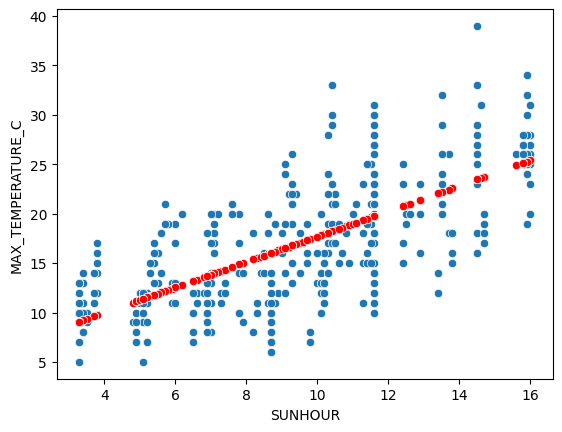

In [11]:
# Votre code ici :
sns.scatterplot(df_weather, x=df_weather['SUNHOUR'],y=df_weather['MAX_TEMPERATURE_C'])
sns.scatterplot(df_weather, x=df_weather['SUNHOUR'],y=df_weather['predict'], color='Red')

Votre prédiction est stockée dans un DataFrame. Ainsi, vous pouvez visualiser vos prédictions sans la colonne "source". Essayons cela.
Créez un graphique de dispersion combiné :
- Axe X : DATE
- Axe Y : Températures maximales (MAX_TEMPERATURE_C) en points bleus et 'predict' en points rouges.

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

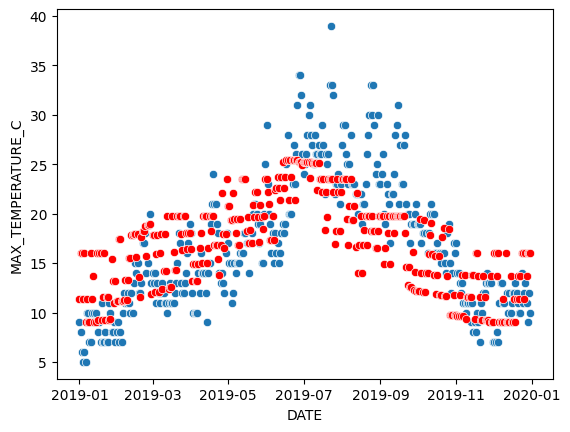

In [12]:
# Votre code ici :
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
sns.scatterplot(df_weather, x=df_weather['DATE'],y=df_weather['MAX_TEMPERATURE_C'])
sns.scatterplot(df_weather, x=df_weather['DATE'],y=df_weather['predict'], color='Red')

**Ca ne semble pas linéaire ! Et pourtant, ça l'est...**

# Prédictions sur une colonne plus corrélée
Refaites les mêmes étapes pour obtenir une nouvelle colonne "predict2". Votre objectif est de prédire "MAX_TEMPERATURE_C" à partir de la colonne "MIN_TEMPERATURE_C".

In [13]:
# Votre code ici :
#on refait un calcul
#nouvelle valeur de x
X = df_weather[['MIN_TEMPERATURE_C']]
modelLR = LinearRegression().fit(X, y)

df_weather['predict_2'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,predict,predict_2
0,2019-01-01,9,4,5.1,11.396823,10.579999
1,2019-01-02,8,5,8.7,16.020019,11.802741
2,2019-01-03,6,0,8.7,16.020019,5.689031
3,2019-01-04,5,-1,5.1,11.396823,4.466289
4,2019-01-05,6,-1,8.7,16.020019,4.466289
...,...,...,...,...,...,...
360,2019-12-27,13,10,8.7,16.020019,17.916452
361,2019-12-28,11,5,6.9,13.708421,11.802741
362,2019-12-29,9,2,8.7,16.020019,8.134515
363,2019-12-30,12,4,8.7,16.020019,10.579999


## Scatterplot 1
- Axe X : Température minimale (MIN_TEMPERATURE_C)
- Axe Y : Température maximale (MAX_TEMPERATURE_C) en points bleus et 'predict2' en points rouges.

<Axes: xlabel='MIN_TEMPERATURE_C', ylabel='MAX_TEMPERATURE_C'>

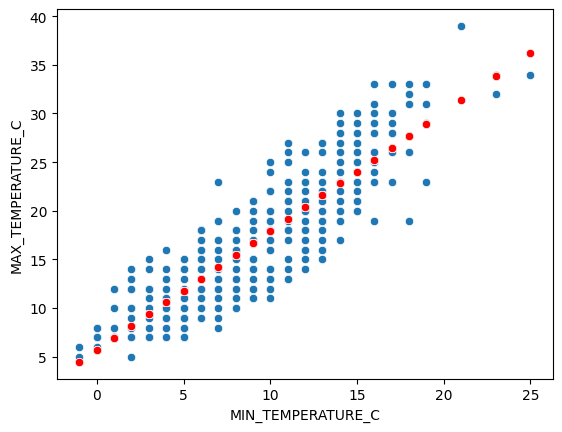

In [14]:
# Votre code ici :
sns.scatterplot(df_weather, x=df_weather['MIN_TEMPERATURE_C'],y=df_weather['MAX_TEMPERATURE_C'])
sns.scatterplot(df_weather, x=df_weather['MIN_TEMPERATURE_C'],y=df_weather['predict_2'], color="Red")

## Scatterplot 2
- Axe X : DATE
- Axe Y : Températures maximale (MAX_TEMPERATURE_C) en points bleus et 'predict2' en points rouges.

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

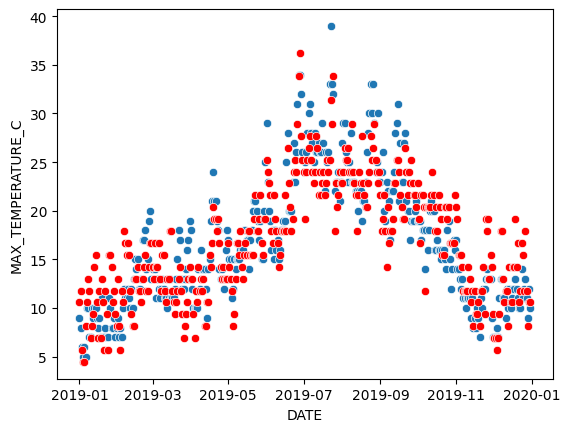

In [15]:
# Votre code ici :
sns.scatterplot(df_weather, x=df_weather['DATE'],y=df_weather['MAX_TEMPERATURE_C'])
sns.scatterplot(df_weather, x=df_weather['DATE'],y=df_weather['predict_2'], color="Red")